In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
CSCO=pd.read_csv("CSCO2.csv")
print("Number of rows and columns:", CSCO.shape)
CSCO.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,27.270000,27.360001,27.040001,27.280001,23.040176,16079300
1,2015-07-13,27.490000,27.799999,27.420000,27.790001,23.470913,20623100
2,2015-07-14,27.870001,28.040001,27.700001,28.030001,23.673609,20932800
3,2015-07-15,27.860001,28.240000,27.809999,28.110001,23.741179,23378400
4,2015-07-16,28.240000,28.420000,28.209999,28.320000,23.918539,21058100


In [3]:
training_set = CSCO.iloc[:800, 1:2].values
test_set = CSCO.iloc[800:, 1:2].values

In [4]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(np.shape(X_train))

(740, 60, 1)


In [5]:
#Adding the first LSTM layer and some Dropout regularisation
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#model.add(Dropout(0.2))

model.add(LSTM(units = 50))
#model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
740/740 [==============================] - 11s 15ms/step - loss: 0.0464
Epoch 2/10
740/740 [==============================] - 6s 8ms/step - loss: 0.0036
Epoch 3/10
740/740 [==============================] - 6s 8ms/step - loss: 0.0018
Epoch 4/10
740/740 [==============================] - 6s 8ms/step - loss: 0.0017
Epoch 5/10
740/740 [==============================] - 6s 8ms/step - loss: 0.0017
Epoch 6/10
740/740 [==============================] - 6s 8ms/step - loss: 0.0017
Epoch 7/10
740/740 [==============================] - 6s 9ms/step - loss: 0.0016
Epoch 8/10
740/740 [==============================] - 6s 9ms/step - loss: 0.0016
Epoch 9/10
740/740 [==============================] - 6s 9ms/step - loss: 0.0016
Epoch 10/10
740/740 [==============================] - 6s 8ms/step - loss: 0.0015


In [6]:
dataset_train = CSCO.iloc[:800, 1:2]
dataset_test = CSCO.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [7]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

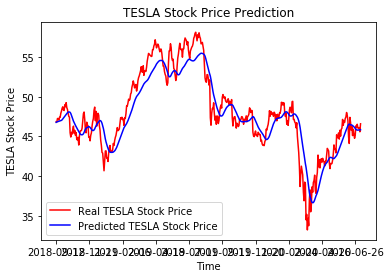

In [8]:
plt.plot(CSCO.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real TESLA Stock Price")
plt.plot(CSCO.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()